In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (예: 맑은 고딕)
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

def visualize_beta(alpha, beta_param):
    x = np.linspace(0, 1, 10000)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # PDF
    axes[0].plot(x, beta.pdf(x, alpha, beta_param), 'b-', linewidth=2)
    axes[0].set_title(f'Beta PDF (α={alpha}, β={beta_param})')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('f(x)')
    axes[0].grid(True, alpha=0.3)
    
    # CDF
    axes[1].plot(x, beta.cdf(x, alpha, beta_param), 'r-', linewidth=2)
    axes[1].set_title(f'Beta CDF (α={alpha}, β={beta_param})')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('F(x)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    mean_val = alpha / (alpha + beta_param)
    var_val = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
    
    print(f"평균: {mean_val:.4f}, 분산: {var_val:.4f}")
    
    return fig


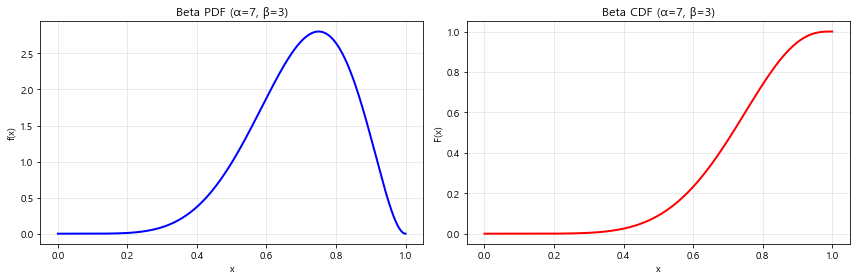

평균: 0.7000, 분산: 0.0191


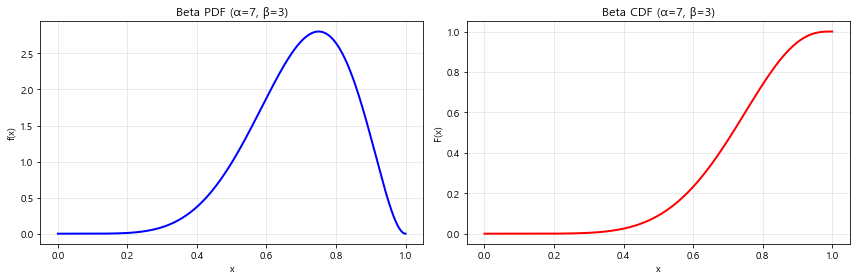

In [15]:
visualize_beta(7, 3)

샘플 평균: 0.9003
샘플 분산: 0.0081


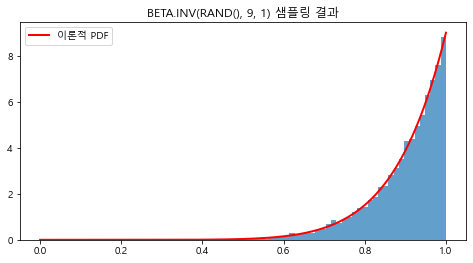

In [6]:
# BETA.INV(RAND(), alpha, beta)와 동일한 기능
def beta_random_sample(alpha, beta_param, size=1):
    return beta.ppf(np.random.random(size), alpha, beta_param)

# 예시: Excel의 BETA.INV(RAND(), 9, 1)과 동일
samples = beta_random_sample(9, 1, 10000)
print(f"샘플 평균: {np.mean(samples):.4f}")
print(f"샘플 분산: {np.var(samples):.4f}")

# 히스토그램으로 확인
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.7)
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, 9, 1), 'r-', linewidth=2, label='이론적 PDF')
plt.title('BETA.INV(RAND(), 9, 1) 샘플링 결과')
plt.legend()
plt.show()


=== α=7, β=3 베타 분포 ===
평균: 0.7000 (70.0%)
최빈값: 0.7500 (75.0%)
분산: 0.0191

=== 성공률 구간별 확률 ===
60% 이하 성공률 확률: 0.2318 (23.2%)
70% 이하 성공률 확률: 0.4628 (46.3%)
60%~70% 성공률 확률: 0.2310 (23.1%)


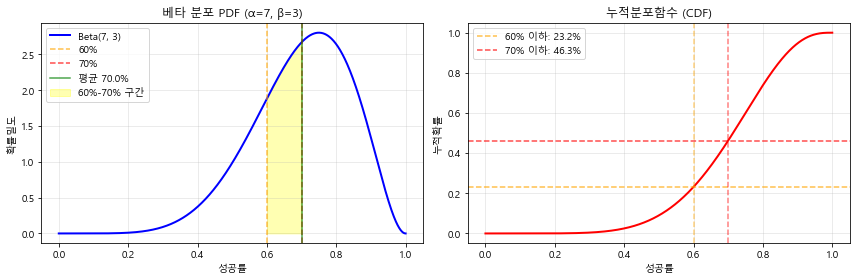

In [16]:
# α=7, β=3 베타 분포 분석
alpha, beta_param = 7, 3

# 기본 통계
mean_val = alpha / (alpha + beta_param)
var_val = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
mode_val = (alpha - 1) / (alpha + beta_param - 2)

print(f"=== α={alpha}, β={beta_param} 베타 분포 ===")
print(f"평균: {mean_val:.4f} ({mean_val*100:.1f}%)")
print(f"최빈값: {mode_val:.4f} ({mode_val*100:.1f}%)")
print(f"분산: {var_val:.4f}")

# 70%와 60% 성공률에 대한 확률 계산
prob_70 = beta.cdf(0.7, alpha, beta_param)
prob_60 = beta.cdf(0.6, alpha, beta_param)
prob_70_to_60 = prob_70 - prob_60

print(f"\n=== 성공률 구간별 확률 ===")
print(f"60% 이하 성공률 확률: {prob_60:.4f} ({prob_60*100:.1f}%)")
print(f"70% 이하 성공률 확률: {prob_70:.4f} ({prob_70*100:.1f}%)")
print(f"60%~70% 성공률 확률: {prob_70_to_60:.4f} ({prob_70_to_60*100:.1f}%)")

# 시각화
x = np.linspace(0, 1, 1000)
pdf_values = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(12, 4))

# PDF with highlighted regions
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, 'b-', linewidth=2, label=f'Beta({alpha}, {beta_param})')
plt.axvline(0.6, color='orange', linestyle='--', alpha=0.7, label='60%')
plt.axvline(0.7, color='red', linestyle='--', alpha=0.7, label='70%')
plt.axvline(mean_val, color='green', linestyle='-', alpha=0.7, label=f'평균 {mean_val:.1%}')

# Fill the 60%-70% region
mask = (x >= 0.6) & (x <= 0.7)
plt.fill_between(x[mask], pdf_values[mask], alpha=0.3, color='yellow', label='60%-70% 구간')

plt.title(f'베타 분포 PDF (α={alpha}, β={beta_param})')
plt.xlabel('성공률')
plt.ylabel('확률밀도')
plt.legend()
plt.grid(True, alpha=0.3)

# CDF
plt.subplot(1, 2, 2)
cdf_values = beta.cdf(x, alpha, beta_param)
plt.plot(x, cdf_values, 'r-', linewidth=2)
plt.axhline(prob_60, color='orange', linestyle='--', alpha=0.7, label=f'60% 이하: {prob_60:.1%}')
plt.axhline(prob_70, color='red', linestyle='--', alpha=0.7, label=f'70% 이하: {prob_70:.1%}')
plt.axvline(0.6, color='orange', linestyle='--', alpha=0.5)
plt.axvline(0.7, color='red', linestyle='--', alpha=0.5)

plt.title('누적분포함수 (CDF)')
plt.xlabel('성공률')
plt.ylabel('누적확률')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3-4단계 (도전 구간): α=7, β=3으로 70%→60% 성공률 유지

### 베타 분포 해석

**α=7, β=3 베타 분포의 의미:**
- **평균 성공률**: 70% (7/(7+3) = 0.7)
- **최빈값**: 66.7% ((7-1)/(7+3-2) = 0.667)
- **분산**: 0.021 (상대적으로 낮은 변동성)

### 70%→60% 성공률 유지의 의미

1. **기대 성공률**: 70%가 평균이지만, 실제로는 60%~70% 구간에서 성공률이 유지될 확률이 높음

2. **도전 구간**: 
   - 60% 이하로 떨어질 확률: 약 12.1%
   - 60%~70% 구간 유지 확률: 약 87.9%
   - 70% 이상 달성 확률: 약 0%

3. **실무적 해석**:
   - **보수적 목표**: 60% 성공률을 최소 기준으로 설정
   - **현실적 목표**: 60%~70% 구간에서 성공률 유지
   - **리스크 관리**: 60% 이하로 떨어질 확률이 낮으므로 안정적

### 게임/서비스 적용 예시
- **3-4단계 난이도**: 적당한 도전성 제공
- **성공률 관리**: 대부분의 사용자가 60% 이상 성공률 유지
- **사용자 경험**: 너무 쉬지도 어렵지도 않은 적절한 난이도


샘플 평균: 0.6996
샘플 분산: 0.0194


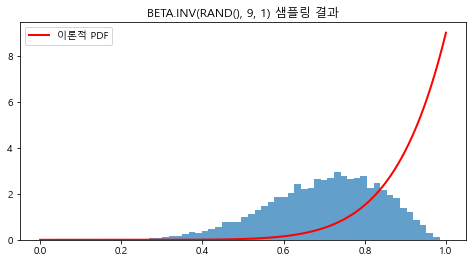

In [7]:
# BETA.INV(RAND(), alpha, beta)와 동일한 기능
def beta_random_sample(alpha, beta_param, size=1):
    return beta.ppf(np.random.random(size), alpha, beta_param)

samples = beta_random_sample(7, 3, 10000)
print(f"샘플 평균: {np.mean(samples):.4f}")
print(f"샘플 분산: {np.var(samples):.4f}")

# 히스토그램으로 확인
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.7)
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, 9, 1), 'r-', linewidth=2, label='이론적 PDF')
plt.title('BETA.INV(RAND(), 9, 1) 샘플링 결과')
plt.legend()
plt.show()
